# Лабораторная работа 1
## Крючкова Анастасия Сергеевна ИВТ 1.2

In [10]:
%pip install pandas matplotlib seaborn numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Импорты и первичные действия

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [12]:
data = pd.read_csv('./data/insurance.csv')
data.head()
print(data.shape)
print(data.isnull().sum())
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1) 
data = pd.get_dummies(data)
data.head()
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

(1338, 7)
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Разбиение на тренировочную и тестовую выборки с помощью train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1070, 9)
Test shape: (268, 9)


# Подсчет метрик R^2, MAE, MAPE

In [14]:
linear_reg_model = linear_model.LinearRegression()
linear_reg_model
linear_reg_model.fit(X_train, y_train)
intercept = linear_reg_model.intercept_
y_train_pred = linear_reg_model.predict(X_train)
y_test_pred = linear_reg_model.predict(X_test)

# Функция для подсчета метрик R^2, MAE, MAPE
print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pred)))
print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pred)*100))
print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))
print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_pred)*100))
print("Значение свободного члена (intercept) обученной модели:", round(intercept, 2))

Train R^2: 0.742
Train MAE: 4208.235
Train MAPE: 42.203
Test R^2: 0.784
Test MAE: 4181.194
Test MAPE: 46.888
Значение свободного члена (intercept) обученной модели: -12390.8


# Задание 3

C:\Users\neste\AppData\Local\Temp\ipykernel_21008\2806284609.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


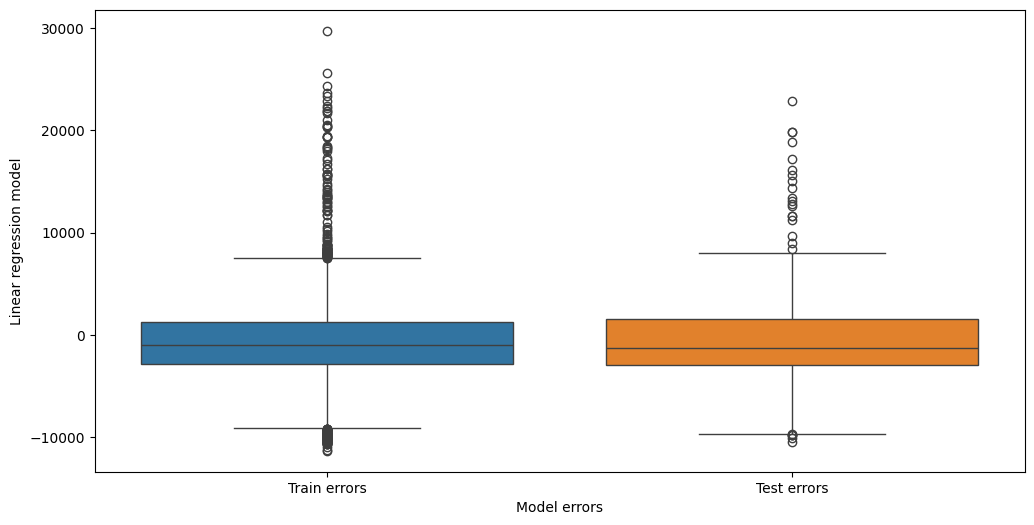

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
y_train_errors = y_train - y_train_pred
y_test_errors = y_test - y_test_pred
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors')
ax.set_ylabel('Linear regression model')
fig.show()

# Задание 4

In [16]:

# Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
# Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


# Задание 5

In [17]:
y_train_log = np.log(y_train)
ridge_linear_reg_poly = linear_model.Ridge()
ridge_linear_reg_poly.fit(X_train_scaled_poly, y_train_log)

y_train_pred = np.exp(ridge_linear_reg_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_linear_reg_poly.predict(X_test_scaled_poly))

# Подсчет метрик R^2, MAE, MAPE
print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pred)))
print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pred)*100))
print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))
print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_pred)*100))
print("Значение свободного члена (intercept) обученной модели:", round(intercept, 2))

Train R^2: 0.816
Train MAE: 2684.509
Train MAPE: 18.243
Test R^2: 0.857
Test MAE: 2424.021
Test MAPE: 17.912
Значение свободного члена (intercept) обученной модели: -12390.8


# Задание 6

In [18]:
print("Коэффициенты модели:")
coefficients = ridge_linear_reg_poly.coef_
for i, coef in enumerate(coefficients):
    print(f"Коэффициент для признака x^{i}: {coef}")

Коэффициенты модели:
Коэффициент для признака x^0: 1.6106818022526994
Коэффициент для признака x^1: -0.1254687564416069
Коэффициент для признака x^2: 0.2381597736797066
Коэффициент для признака x^3: 0.7995750337395029
Коэффициент для признака x^4: 0.7117207945619857
Коэффициент для признака x^5: 0.047008310632162806
Коэффициент для признака x^6: 0.0324316960911319
Коэффициент для признака x^7: -0.017100767110641502
Коэффициент для признака x^8: -0.06233923961270004
Коэффициент для признака x^9: -0.17903953561637564
Коэффициент для признака x^10: 0.22817373738251592
Коэффициент для признака x^11: 0.008252553775563956
Коэффициент для признака x^12: -0.7169733247435333
Коэффициент для признака x^13: -1.370540788462
Коэффициент для признака x^14: 0.20746182949999223
Коэффициент для признака x^15: 0.31433267250049607
Коэффициент для признака x^16: 0.502014797369646
Коэффициент для признака x^17: 0.5868725028825664
Коэффициент для признака x^18: -0.1254687564416057
Коэффициент для признака x

# Задание 7

In [19]:

# Линейная регрессия с L1 регуляризацией (Lasso)
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
lasso_lr_poly.fit(X_train_scaled_poly, y_train_log)

y_train_pred = np.exp(lasso_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(lasso_lr_poly.predict(X_test_scaled_poly))
# Подсчет метрик R^2, MAE, MAPE
print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pred)))
print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_pred)*100))
print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))
print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_pred)*100))
print("Значение свободного члена (intercept) обученной модели:", round(intercept, 2))

Train R^2: -0.126
Train MAE: 8293.602
Train MAPE: 96.957
Test R^2: -0.098
Test MAE: 8603.138
Test MAPE: 107.491
Значение свободного члена (intercept) обученной модели: -12390.8
